In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fileName="vehicles.csv"
vehicles = pd.read_csv(fileName)
vehicles

vehicles = vehicles.drop("model", axis=1)
vehicles = vehicles.drop("url", axis=1)
vehicles = vehicles.drop("region_url", axis=1)
vehicles = vehicles.drop("image_url", axis=1)
vehicles = vehicles.drop("posting_date", axis=1)
vehicles = vehicles.drop("VIN", axis=1)
vehicles = vehicles.drop("county", axis=1)
vehicles = vehicles.drop("id", axis=1)
vehicles = vehicles.drop("description", axis=1)
vehicles = vehicles.drop("size", axis=1)
vehicles = vehicles.drop("state", axis=1)
vehicles = vehicles.drop("region", axis=1)
vehicles = vehicles.drop("title_status", axis=1)
vehicles = vehicles.drop("lat", axis=1)
vehicles = vehicles.drop("long", axis=1)

vehicles['cylinders'] = vehicles["cylinders"].str.replace('cylinders', '')
vehicles['cylinders'] = vehicles["cylinders"].str.replace('other', 'NaN')

vehicles = pd.DataFrame.dropna(vehicles)

index_names = vehicles[vehicles['odometer'] > 300000].index
vehicles.drop(index_names, inplace = True)

index_names = vehicles[vehicles['price'] > 170000].index
vehicles.drop(index_names, inplace = True)

index_names = vehicles[vehicles['price'] < 500].index
vehicles.drop(index_names, inplace = True)

vehicles.cylinders = vehicles['cylinders'].astype("float")

vehicles = pd.DataFrame.dropna(vehicles)

vehicles_num = ((((((((vehicles.drop("paint_color", axis=1)).drop("type", axis=1)).drop("drive", axis=1)).drop("transmission", axis=1)).drop("fuel", axis=1)).drop("condition", axis=1)).drop("manufacturer", axis=1)).drop('price', axis=1))
vehicles_cat = vehicles.drop("cylinders", axis=1).drop('year', axis=1).drop('odometer', axis=1).drop('price', axis=1)
targets = vehicles['price']

targets = targets.astype("float")

In [2]:
vehicles['price'].describe()

count    110024.000000
mean      16261.855404
std       13313.406886
min         500.000000
25%        6495.000000
50%       11950.000000
75%       23950.000000
max      169999.000000
Name: price, dtype: float64

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110024 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         110024 non-null  int64  
 1   year          110024 non-null  float64
 2   manufacturer  110024 non-null  object 
 3   condition     110024 non-null  object 
 4   cylinders     110024 non-null  float64
 5   fuel          110024 non-null  object 
 6   odometer      110024 non-null  float64
 7   transmission  110024 non-null  object 
 8   drive         110024 non-null  object 
 9   type          110024 non-null  object 
 10  paint_color   110024 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.1+ MB


In [4]:
vehicles.manufacturer.unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'ram', 'mercedes-benz', 'infiniti', 'bmw',
       'volkswagen', 'mazda', 'porsche', 'lexus', 'rover', 'ferrari',
       'audi', 'mitsubishi', 'kia', 'hyundai', 'fiat', 'acura',
       'cadillac', 'lincoln', 'jaguar', 'volvo', 'alfa-romeo', 'buick',
       'subaru', 'pontiac', 'saturn', 'mini', 'tesla', 'harley-davidson',
       'mercury', 'datsun', 'land rover', 'aston-martin', 'morgan'],
      dtype=object)

In [5]:
index_names = vehicles[vehicles['manufacturer'] == 'rover'].index
vehicles.drop(index_names, inplace = True)

index_names = vehicles[vehicles['manufacturer'] == 'harley-davidson'].index
vehicles.drop(index_names, inplace = True)

In [6]:
vehicles.manufacturer.unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'honda',
       'dodge', 'chrysler', 'ram', 'mercedes-benz', 'infiniti', 'bmw',
       'volkswagen', 'mazda', 'porsche', 'lexus', 'ferrari', 'audi',
       'mitsubishi', 'kia', 'hyundai', 'fiat', 'acura', 'cadillac',
       'lincoln', 'jaguar', 'volvo', 'alfa-romeo', 'buick', 'subaru',
       'pontiac', 'saturn', 'mini', 'tesla', 'mercury', 'datsun',
       'land rover', 'aston-martin', 'morgan'], dtype=object)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


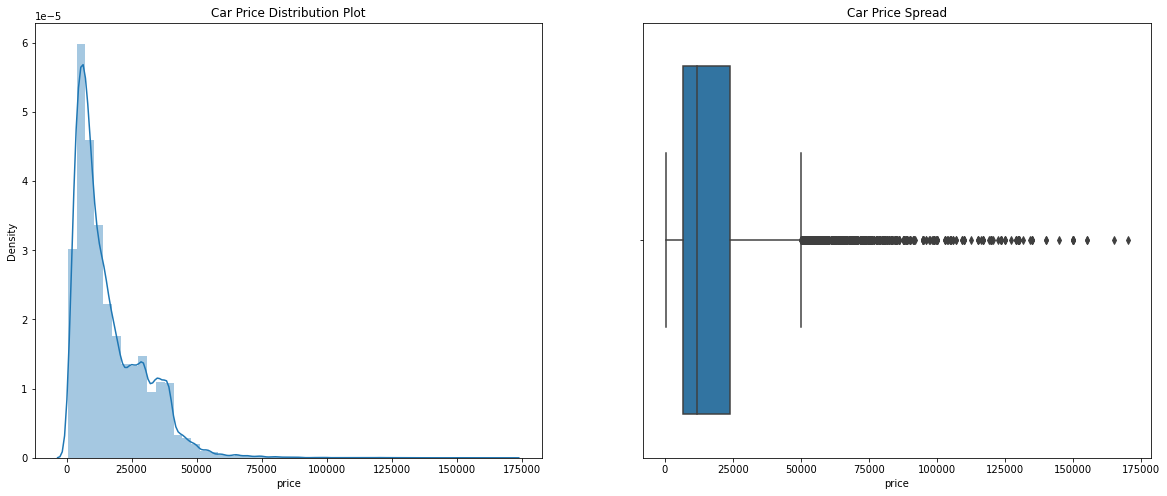

In [7]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(vehicles.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=vehicles.price)

plt.show()

In [8]:
print(vehicles.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    109505.000000
mean      16229.426081
std       13272.982741
min         500.000000
25%        6490.000000
50%       11900.000000
75%       23900.000000
85%       30990.000000
90%       35590.000000
100%     169999.000000
max      169999.000000
Name: price, dtype: float64


[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of company')]

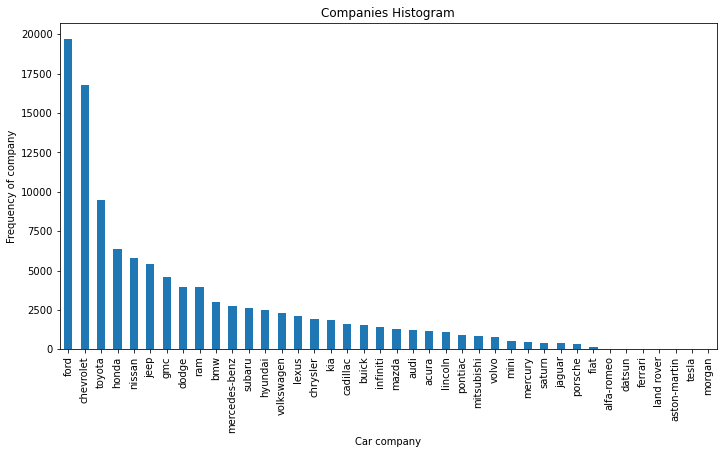

In [9]:
plt.figure(figsize=(40, 6))

plt.subplot(1,3,1)
plt1 = vehicles.manufacturer.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

In [10]:
vehicles.rename(
    columns=({ 'type': 'vehicle_type'}), 
    inplace=True,
)

In [11]:
vehicles

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,vehicle_type,paint_color
31,15000,2013.0,ford,excellent,6.0,gas,128000.0,automatic,rwd,truck,black
32,27990,2012.0,gmc,good,8.0,gas,68696.0,other,4wd,pickup,black
33,34590,2016.0,chevrolet,good,6.0,gas,29499.0,other,4wd,pickup,silver
34,35000,2019.0,toyota,excellent,6.0,gas,43000.0,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,good,6.0,gas,17302.0,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2020.0,cadillac,good,6.0,gas,7701.0,other,fwd,other,black
426860,39990,2017.0,infiniti,good,8.0,gas,41664.0,automatic,4wd,other,black
426866,32990,2016.0,infiniti,good,8.0,gas,55612.0,automatic,rwd,other,black
426874,33590,2018.0,lexus,good,6.0,gas,30814.0,automatic,rwd,sedan,white


In [12]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
vehicles_cat_1hot = cat_encoder.fit_transform(vehicles_cat)


vehicles_cat_df = pd.DataFrame(vehicles_cat_1hot)
vehicles_num.index = list(range(110024))
frames = [vehicles_num, vehicles_cat_df]
  
vehicles_data_prep = pd.concat(frames, axis=1)

In [13]:
vehicles_data_prep

,year,cylinders,odometer,0,1,2,3,4,5,6
0,2013.0,6.0,128000.0,13.0,0.0,2.0,0.0,2.0,10.0,0.0
1,2012.0,8.0,68696.0,14.0,2.0,2.0,2.0,0.0,8.0,0.0
2,2016.0,6.0,29499.0,7.0,2.0,2.0,2.0,0.0,8.0,9.0
3,2019.0,6.0,43000.0,39.0,0.0,2.0,0.0,0.0,10.0,5.0
4,2016.0,6.0,17302.0,7.0,2.0,2.0,2.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
110019,2020.0,6.0,7701.0,6.0,2.0,2.0,2.0,1.0,7.0,0.0
110020,2017.0,8.0,41664.0,18.0,2.0,2.0,0.0,0.0,7.0,0.0
110021,2016.0,8.0,55612.0,18.0,2.0,2.0,0.0,2.0,7.0,0.0
110022,2018.0,6.0,30814.0,23.0,2.0,2.0,0.0,2.0,9.0,10.0


In [14]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vehicles_data_prep, targets, test_size=0.15, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error

y_preds = regressor.predict(X_test)
SGD_rmse = mean_squared_error(y_test, y_preds)
SGD_rmse

69458106.28662884

In [16]:
d = {'y_pred': y_preds, 'y_test': y_test}
compare = pd.DataFrame(data=d)

In [17]:
compare

,y_pred,y_test
68054,15889.021442,16500.0
309039,11153.647824,29950.0
305583,14446.549011,7998.0
345957,4224.610289,3500.0
155467,1834.213880,5500.0
...,...,...
415049,-1163.318203,9000.0
49179,10195.256239,6488.0
200911,37472.809331,72900.0
181665,9992.682587,5995.0


In [18]:
import joblib
joblib.dump(regressor, 'final_used_cars_model.pkl')

['final_used_cars_model.pkl']

In [19]:
data = pd.DataFrame({'Make_year': [2013], 'Cylinders': [6], 'Mileage': [128000], 'Manufacturer': [13.0],
                     'Condition': [0.0], 'Fuel_type': [2.0], 'Transmission_type': [0.0], 'Drivetrain': [4.0],
                     'Vehicle_type': [10.0], 'Paint_color': [0.0]})

# open the file
file = open("final_used_cars_model.pkl", "rb")

# load trained model
trained_model = joblib.load(file)

# prediction
prediction = trained_model.predict(data)

In [20]:
prediction

array([8090.45776638])